In [1]:
#%% Imports

# Basic Imports 
import numpy as np
import pandas as pd

# Plotting Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('geneDiseaseNetwork.tsv', sep = "\t")

#Printing the first few rows to get a superficial understanding of the dataset
df.head()

/mnt/home/f0102402/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NID,diseaseNID,geneNID,source,association,associationType,sentence,pmid,score,EL,EI,year
0,1130681,2107,793,BEFREE,NaN,Biomarker,No correlation could be found between Broder's...,1000501.0,0.10,NaN,0.956175,1976.0
1,261998,431,775,BEFREE,NaN,GeneticVariation,"However, there are few reports describing soma...",10021299.0,0.40,NaN,0.987013,1999.0
2,369637,450,775,BEFREE,NaN,GeneticVariation,WAF1 genotype and endometrial cancer susceptib...,10021299.0,0.02,NaN,1.000000,1999.0
3,2128526,10033,775,BEFREE,NaN,GeneticVariation,WAF1 genotype and endometrial cancer susceptib...,10021299.0,0.07,NaN,1.000000,1999.0
4,262799,431,7385,BEFREE,NaN,Biomarker,APC and APC2 may therefore have comparable fun...,10021369.0,0.01,NaN,1.000000,1999.0


In [ ]:
dftest = 

In [3]:
#Printing the Size of the Dataset:
print("The size of the dataset is: ", df.shape)

#Understanding basic information of the data such as min, max, mean, and standard deviation using describe()
df.describe()

The size of the dataset is:  (3261324, 12)


,NID,diseaseNID,geneNID,association,pmid,score,EI,year
count,3.261324e+06,3.261324e+06,3.261324e+06,88228.000000,3.057890e+06,3.261324e+06,3.090428e+06,3.057890e+06
mean,1.630662e+06,7.470427e+03,5.447594e+03,0.070374,2.304652e+07,1.796928e-01,9.727383e-01,2.011842e+03
std,9.414633e+05,7.690316e+03,5.187942e+03,0.255779,7.106197e+06,2.365360e-01,9.088294e-02,7.085840e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.600000e+01,1.000000e-02,0.000000e+00,1.924000e+03
25%,8.153318e+05,1.492000e+03,1.718000e+03,0.000000,1.820908e+07,3.000000e-02,9.756098e-01,2.008000e+03
50%,1.630662e+06,3.715000e+03,3.803000e+03,0.000000,2.469791e+07,1.000000e-01,1.000000e+00,2.014000e+03
75%,2.445993e+06,1.197200e+04,7.049000e+03,0.000000,2.913881e+07,2.000000e-01,1.000000e+00,2.018000e+03
max,3.261324e+06,3.029300e+04,2.613700e+04,1.000000,3.206309e+07,1.000000e+00,1.000000e+00,2.020000e+03


In [4]:
#Checking For Missing Values:
df.isnull().sum()

NID                      0
diseaseNID               0
geneNID                  0
source                   0
association        3173096
associationType          0
sentence            203437
pmid                203434
score                    0
EL                 3121898
EI                  170896
year                203434
dtype: int64

In [5]:
df['associationType'].unique()

array(['Biomarker', 'GeneticVariation', 'AlteredExpression',
       'PosttranslationalModification', 'CausalMutation',
       'ChromosomalRearrangement', 'GermlineCausalMutation',
       'Therapeutic', 'ModifyingMutation', 'SusceptibilityMutation',
       'SomaticCausalMutation', 'FusionGene', 'GermlineModifyingMutation',
       'GenomicAlterations'], dtype=object)

In [6]:
df['association'].unique()

array([nan,  0.,  1.])

In [7]:
numdis = df['diseaseNID'].unique()
numdis.size

30170

In [8]:
numgene = df['geneNID'].unique()
numgene.size

21671

In [11]:
df['source'].unique()

array(['BEFREE', 'MGD', 'UNIPROT', 'CTD_human', 'RGD', 'CLINVAR',
       'CLINGEN', 'GENOMICS_ENGLAND', 'ORPHANET', 'PSYGENET', 'LHGDN',
       'CTD_mouse', 'GWASDB', 'GWASCAT', 'CTD_rat', 'HPO', 'CGI'],
      dtype=object)

In [9]:
#info() outputs basic information of the data set, including features and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261324 entries, 0 to 3261323
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   NID              int64  
 1   diseaseNID       int64  
 2   geneNID          int64  
 3   source           object 
 4   association      float64
 5   associationType  object 
 6   sentence         object 
 7   pmid             float64
 8   score            float64
 9   EL               object 
 10  EI               float64
 11  year             float64
dtypes: float64(5), int64(3), object(4)
memory usage: 298.6+ MB


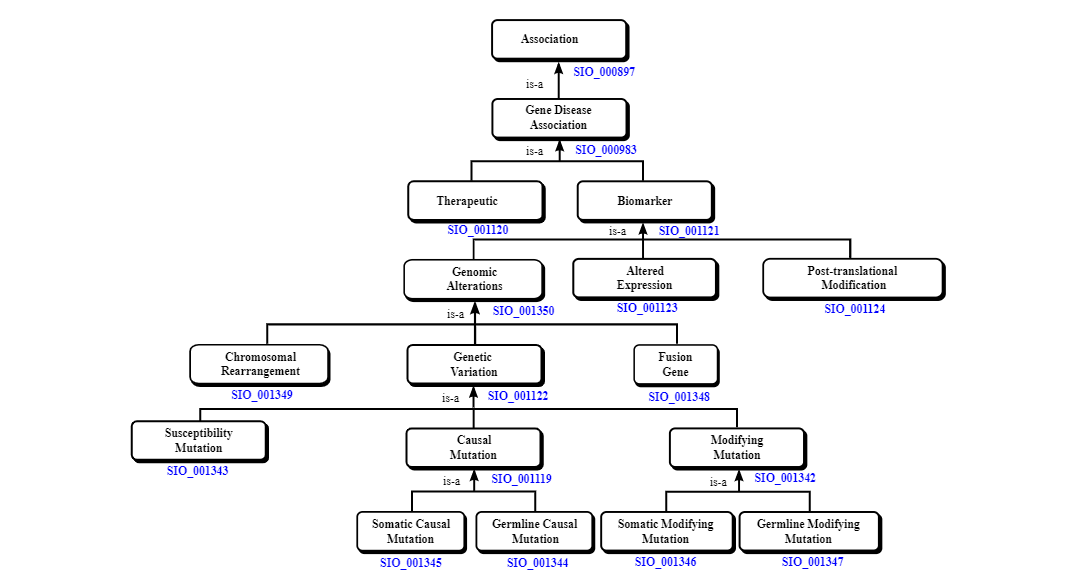

In [10]:
from IPython import display
display.Image("./hierarchy.PNG")

The description of each association type in the ontology is:

- Therapeutic: This relationship indicates that the gene/protein has a therapeutic role in the amelioration of the disease.
- Biomarker: This relationship indicates that the gene/protein either plays a role in the etiology of the disease (e.g. participates in the molecular mechanism that leads to disease) or is a biomarker for a disease.
- Genomic Alterations: This relationship indicates that a genomic alteration is linked to the gene associated with the disease phenotype.
- GeneticVariation: This relationship indicates that a sequence variation (a mutation, a SNP) is associated with the disease phenotype, but there is still no evidence to say that the variation causes the disease.
- Causal Mutation: This relationship indicates that there are allelic variants or mutations known to cause the disease.
- Germline Causal Mutation: This relationship indicates that there are germline allelic variants or mutations known to cause the disease, and they may be passed on to offspring.
- Somatic Causal Mutation: This relationship indicates that there are somatic allelic variants or mutations known to cause the disease, but they may not be passed on to offspring.
- Chromosomal Rearrangement: This relationship indicates that a gene is included in a chromosomal rearrangement associated with a particular manifestation of the disease.
- Fusion Gene: This relationship indicates that the fusion between two different genes (between promoter and/or other coding DNA regions) is associated with the disease.
- Susceptibility Mutation: This relationship indicates that a gene mutation in a germ cell that predisposes to the development of a disorder, and that is necessary but not sufficient for the manifestation of the disease.
- Modifying Mutation: This relationship indicates that a gene mutation is known to modify the clinical presentation of the disease.
- Germline Modifying Mutation: This relationship indicates that a germline gene mutation modifies the clinical presentation of the disease, and it may be passed on to offspring.
- Somatic Modifying Mutation: This relationship indicates that a somatic gene mutation modifies the clinical presentation of the disease, but it may not be passed on to offspring.
- AlteredExpression: This relationship indicates that an altered expression of the gene is associated with the disease phenotype.
- Post-translational Modification: This relationship indicates that alterations in the function of the protein by means of post-translational modifications (methylation or phosphorylation of the protein) are associated with the disease phenotype.